In [1]:
import math
import numpy as np
from pprint import pprint
from bayes_opt import BayesianOptimization


exec(open('utils.py').read())
print('Loaded')


CURRENT_YEAR = 2023
MAX_YEAR = 2123


def derive_nonscaling_delay_curve(nonscaling_points, verbose=True):
    years = list(range(CURRENT_YEAR, nonscaling_points[-1][0]))
    year_cuts = [y[0] for y in nonscaling_points]
    desired = [d[1] for d in nonscaling_points]
    minimum = desired[0]
    maximum = desired[-1]
    bottom_year = year_cuts[-1]
        
    def shape_curve(slope, shift, push):
        out = [generalized_logistic_curve(x=y - CURRENT_YEAR,
                                          slope=slope,
                                          shift=shift,
                                          push=push,
                                          maximum=maximum,
                                          minimum=minimum) for y in year_cuts]
        return -np.mean([np.abs(out[i] - desired[i]) for i in range(len(out))])


    pbounds = {'slope': (0.01, 10),
               'shift': (0.01, 10),
               'push': (0.01, 10)}
    optimizer = BayesianOptimization(f=shape_curve, pbounds=pbounds, verbose=verbose, allow_duplicate_points=True)
    optimizer.maximize(init_points=40, n_iter=80)
    params = optimizer.max['params']
    if verbose:
        print('Curve params found')
        pprint(params)
        print('-')


    def p_nonscaling_delay(year):
        if year == CURRENT_YEAR:
            return minimum
        elif year >= bottom_year:
            return maximum
        else:
            return generalized_logistic_curve(x=year - CURRENT_YEAR,
                                              slope=params['slope'],
                                              shift=params['shift'],
                                              push=params['push'],
                                              maximum=maximum,
                                              minimum=minimum)

    return p_nonscaling_delay

print('Loaded')

Loaded
Loaded


In [2]:
nonscaling_points = [(2023, 0.95),
                     (2027, 0.9),
                     (2030, 0.7),
                     (2035, 0.5),
                     (2050, 0.2)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 6         | -0.4065   | 5.626     | 5.845     | 2.065     |
| 7         | -0.3879   | 9.417     | 3.149     | 0.07377   |
| 10        | -0.2991   | 0.9991    | 5.848     | 0.8944    |
| 19        | -0.139    | 0.9612    | 7.6       | 0.3501    |
| 45        | -0.08656  | 1.036     | 7.976     | 0.1507    |
| 67        | -0.0503   | 0.8025    | 7.695     | 0.2026    |
| 102       | -0.02591  | 0.5566    | 9.645     | 0.2936    |
Curve params found
{'push': 0.5565853234707618,
 'shift': 9.644546861319078,
 'slope': 0.29362571303102664}
-


## Chance of nonscaling delay ##


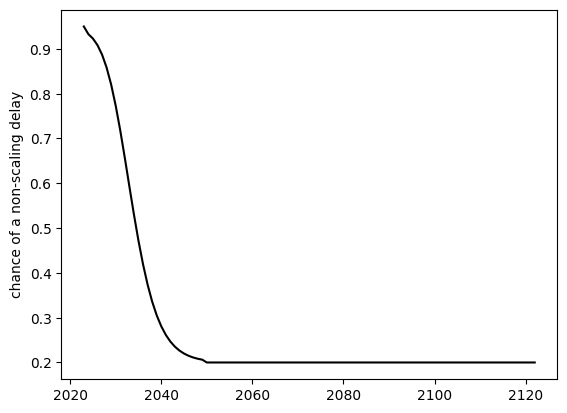

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 93%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 92%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 91%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 89%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 86%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 82%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 77%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 72%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 66%
Year: 2033

In [3]:
years = list(range(CURRENT_YEAR, MAX_YEAR))
print('## Chance of nonscaling delay ##')
p_delay_ = np.array([p_nonscaling_delay(y) for y in years])
plt.plot(years, p_delay_, color='black')
plt.ylabel('chance of a non-scaling delay')
plt.show()

for y in years[:10] + years[10::10]:
    outstr = 'Year: {} - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: {}%'
    print(outstr.format(y, int(round(p_delay_[y - CURRENT_YEAR] * 100))))


In [4]:
with open('caches/nonscaling_delay_array.npy', 'wb') as f:
    np.save(f, p_delay_)
    
print('cached!')

cached!
